# Using the `Scoring` parameter

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
heart_disease = pd.read_csv('Heart_Disease_Prediction.csv')
heart_disease

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [45]:
heart_disease = heart_disease.rename(columns={'Heart Disease': 'Target'})
heart_disease

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [46]:
heart_disease['Target'] = heart_disease['Target'].map({'Presence': 1, 'Absence': 0})
heart_disease

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


#### Classification model

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
X = heart_disease.drop('Target', axis=1)
y = heart_disease['Target']
clf = RandomForestClassifier()

In [17]:
np.random.seed(0)
#cross validation accuracy
cv_acc = cross_val_score(clf, X, y ,cv=5, scoring=None)#cv=5 means it will split X and y into 5 different train and test splits
#if scoring=None, default scoring evaluation metrics is used(accuracy for classification models)
cv_acc

array([0.74074074, 0.7962963 , 0.87037037, 0.77777778, 0.88888889])

In [18]:
#Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)* 100: .2f}%")

The cross-validated accuracy is:  81.48%


In [19]:
np.random.seed(0)
cv_acc = cross_val_score(clf, X,y, cv=5, scoring='accuracy')
cv_acc

array([0.74074074, 0.7962963 , 0.87037037, 0.77777778, 0.88888889])

In [20]:
#Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)* 100: .2f}%")

The cross-validated accuracy is:  81.48%


In [23]:
#Precision
np.random.seed(0)
cv_precision = cross_val_score(clf, X,y, scoring='precision', cv=5)
cv_precision

array([0.72727273, 0.7826087 , 0.86956522, 0.77272727, 0.90909091])

In [27]:
#Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8122529644268776


In [28]:
#Recall
np.random.seed(0)
cv_recall = cross_val_score(clf,X,y, cv=5, scoring='recall')
cv_recall

array([0.66666667, 0.75      , 0.83333333, 0.70833333, 0.83333333])

In [29]:
#Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.7583333333333334


In [32]:
#F1 score
np.random.seed(0)
cv_f1 = cross_val_score(clf, X,y, scoring='f1', cv=5)
cv_f1

array([0.69565217, 0.76595745, 0.85106383, 0.73913043, 0.86956522])

In [33]:
#Cross-validated F1-score
print(f"The cross-validated F1-score is: {np.mean(cv_f1)}")

The cross-validated F1-score is: 0.7842738205365403


#### Regression model

In [34]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [35]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [36]:
housing_df['MedHouseVal'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [37]:
housing_df['Target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [38]:
housing_df = housing_df.drop('MedHouseVal', axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)
X = housing_df.drop('Target', axis=1)
y = housing_df['Target']
model = RandomForestRegressor()

In [40]:
#R-squared
np.random.seed(0)
cv_r2 = cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)

0.6555710419422047

In [41]:
cv_r2

array([0.53318964, 0.70292039, 0.73773326, 0.62397999, 0.68003192])

In [44]:
#Mean absolute error
cv_mae = cross_val_score(model, X,y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4819362620542636

In [46]:
cv_mae

array([-0.5168542 , -0.42319054, -0.50576404])

In [45]:
#Mean squared error
cv_mse = cross_val_score(model, X,y, cv=3, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.46397791961494356

In [47]:
cv_mse

array([-0.51860507, -0.33292701, -0.54040168])

### Using different evaluation metrics as scikit-learn functions 

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(0)
#create X and y
X = heart_disease.drop('Target', axis=1)
y = heart_disease['Target']
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#create model
clf = RandomForestClassifier()
#fit model
clf.fit(X_train, y_train)
#Make predictions
y_preds = clf.predict(X_test)
#Evaluate model using evaluation functions
print('Classification metrics on test set')
print(f"Accuracy score: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision score: {precision_score(y_test,y_preds)}")
print(f"Recall score: {recall_score(y_test,y_preds)}")
print(f"F1 score: {f1_score(y_test,y_preds)}")

Classification metrics on test set
Accuracy score: 79.63%
Precision score: 0.8095238095238095
Recall score: 0.7083333333333334
F1 score: 0.7555555555555556


In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)
#Create X and y
X = housing_df.drop('Target', axis=1)
y = housing_df['Target']
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
#Create model
model = RandomForestRegressor()
#fit model
model.fit(X_train, y_train)
#Make predictions
y_preds = model.predict(X_test)
#Evaluating model using evaluation metrics
print('Regression metrics on test data')
print(f"r2 score: {r2_score(y_test, y_preds)}")
print(f"mean_absolute_error: {mean_absolute_error(y_test, y_preds)}")
print(f"mean_squared_error: {mean_squared_error(y_test, y_preds)}")

Regression metrics on test data
r2 score: 0.7977645205563335
mean_absolute_error: 0.3353786242248063
mean_squared_error: 0.2637059448425481


# Improving a model
First predictions = Baseline predictions, First model = Baseline model
From a data perspective:
* Could we collect more data? (more the data, better results)
* Could we improve our data?

From a model perspective:
* Is there a better model we can use?
* Could we improve the current model?

Hyperparameters Vs Parameters
* Paramaters = model find these patterns in data
* Hyperparameters = settings on the model you can adjust to improve its ability to find patterns

Three ways to adjust hyperparamaters:
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [58]:
#once model is instantiated, get_params() function can be used to find its hyper parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Tuning hyperparameters by hand
Lets make three sets: Training, validation and test

We are going to try and adjust the following:
    * `max_depth`
    * `max_features`
    * `min_samples_leaf`
    * `min_samples_split`
    * `n_estimators`

In [47]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [48]:

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("Target", axis=1)
y = heart_disease_shuffled["Target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 87.80%
Precision: 0.95
Recall: 0.84
F1 score: 0.89


{'accuracy': 0.88, 'precision': 0.95, 'recall': 0.84, 'f1': 0.89}

In [10]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
np.random.seed(0)
clf_2 = RandomForestClassifier(max_depth=20)
clf_2.fit(X_train, y_train)
y_preds2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds2)

Acc: 85.37%
Precision: 0.91
Recall: 0.84
F1 score: 0.87


## Tuning hyperparameters by Randomized Search Cross Validation

In [30]:
from sklearn.model_selection import RandomizedSearchCV
grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2,4,6],
        'min_samples_leaf': [1,2,4]}

np.random.seed(0)

#Split into X and y
X = heart_disease_shuffled.drop('Target', axis=1)
y = heart_disease_shuffled['Target']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #n_jobs means how much of your computer process are you going to dedicate towards this machine learning model.
#n_jobs=-1 means all of it

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter = 10, #no of models to try
                           cv=5,verbose=2)
#Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  13.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; t

In [31]:
#returns the best possible combination
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [32]:
#Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.48%
Precision: 0.83
Recall: 0.76
F1 score: 0.79


## Hyperparameter tuning with GridSearchCV

In [33]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [34]:
#gridsearchcv is like brute force search ie it goes through every single combination that is available
grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [49]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(0)
#Split into X and y
X = heart_disease_shuffled.drop('Target', axis=1)
y = heart_disease_shuffled['Target']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #n_jobs means how much of your computer process are you going to dedicate towards this machine learning model.
#n_jobs=-1 means all of it

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2,
                           cv=5,verbose=2)
#Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [36]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [37]:
gs_y_preds = gs_clf.predict(X_test)
#Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 77.78%
Precision: 0.76
Recall: 0.76
F1 score: 0.76


Lets compare our different models metrics

<AxesSubplot:>

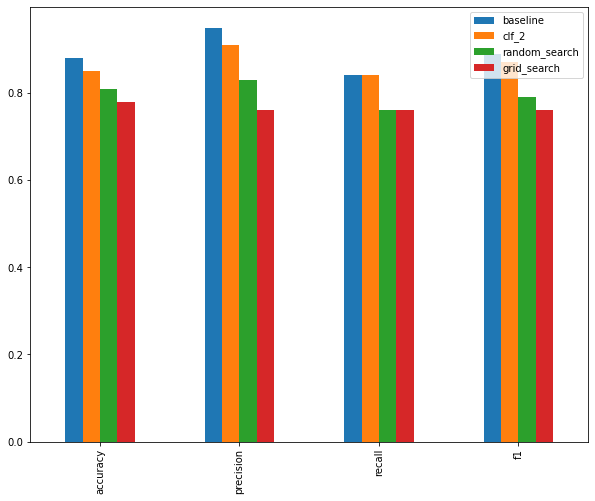

In [41]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics, 'clf_2': clf_2_metrics, 'random_search': rs_metrics,
                               'grid_search': gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

## Saving and loading trained machine learning models

Two ways to save and load machine learning models:
* With python's `pickle` module
* With the `joblib` module

#### Using pickle

In [51]:
import pickle

#save an existing model to file
pickle.dump(gs_clf, open("gs_clf_random_forest_model1.pkl", "wb")) #wb-> write binary

In [52]:
#Load a saved model
loaded_pickle_model = pickle.load(open("gs_clf_random_forest_model1.pkl", "rb")) #rb-> read binary


In [53]:
#Make some predictions to see if model is loaded
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 77.78%
Precision: 0.76
Recall: 0.76
F1 score: 0.76


{'accuracy': 0.78, 'precision': 0.76, 'recall': 0.76, 'f1': 0.76}

#### Using joblib

In [54]:
from joblib import dump, load
dump(gs_clf, filename="gs_random_forest_model1.joblib")

['gs_random_forest_model1.joblib']

In [55]:
#import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model1.joblib")

In [57]:
#make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 77.78%
Precision: 0.76
Recall: 0.76
F1 score: 0.76


{'accuracy': 0.78, 'precision': 0.76, 'recall': 0.76, 'f1': 0.76}

# Getting it all together

In [59]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [63]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [64]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

1. Fill in missing data
2. Convert the data to numbers
3. Build a ML model on the data

In [67]:
#getting data ready
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #to fill in missing data
from sklearn.preprocessing import OneHotEncoder #convert data to numbers

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed
np.random.seed(0)

#import data and drop rows with missing values
data.dropna(subset=['Price'], inplace=True)

#Define different features and transformer pipelines
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value='missing')),
                                          ("one_hot", OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4)),  
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

#setup preprocessing steps(fill missing values then convert to numbers)
preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features),
                                               ("door", door_transformer, door_feature),
                                               ("num", numeric_transformer, numeric_features)])

#creating preprocessing and modelling
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

#Create X and y
X = data.drop('Price', axis=1)
y = data['Price']

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.151921705833436

It is possible to use `GridSearchCV` or `RandomizedSearchCV` with our pipeline

In [68]:
#Use GridSearchCV with our regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators" : [100,1000],
    "model__max_depth" : [None,5],
    "model__max_features" : ["auto"],
    "model__min_samples_split": [2,4]
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   4.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
        

In [69]:
gs_model.score(X_test, y_test)

0.3376840681624885